In [265]:
#Import all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

bank_df = pd.read_csv('/Users/joeywang/Desktop/MIT data anaylytics/Big data analysis /Project/bank/bankfull2.csv')
bank_df.head(20)

import warnings
warnings.filterwarnings('ignore')

In [266]:
#Check general information 
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [267]:
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [268]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [269]:
bank_df.rename(columns={'y':'deposit',},inplace=True)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Text(0.5, 0.98, 'General Analysis')

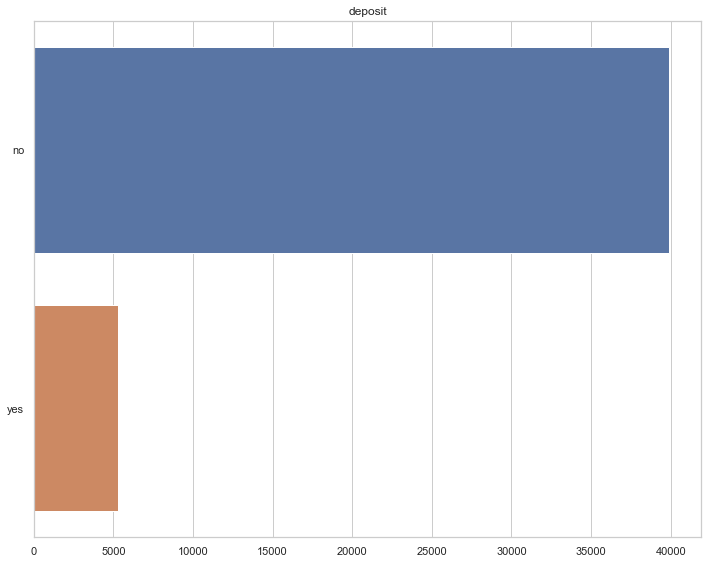

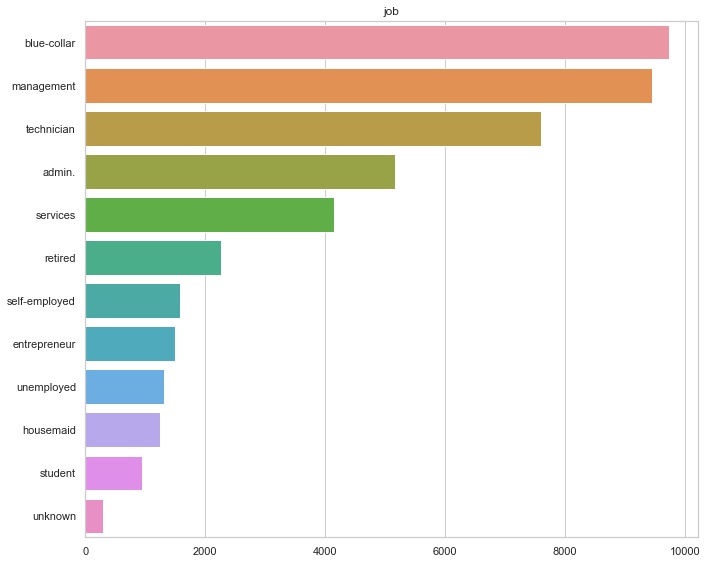

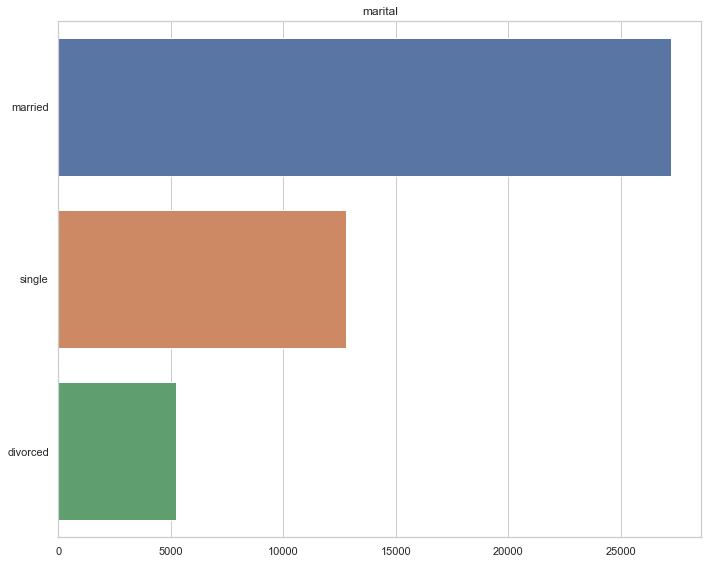

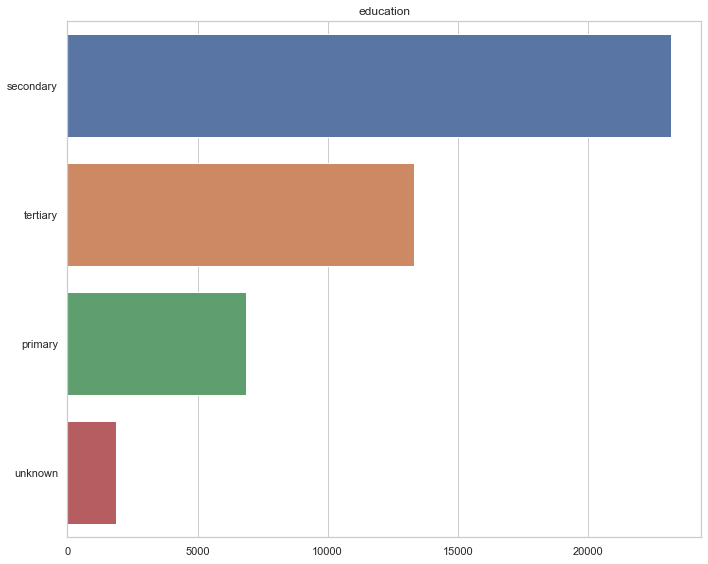

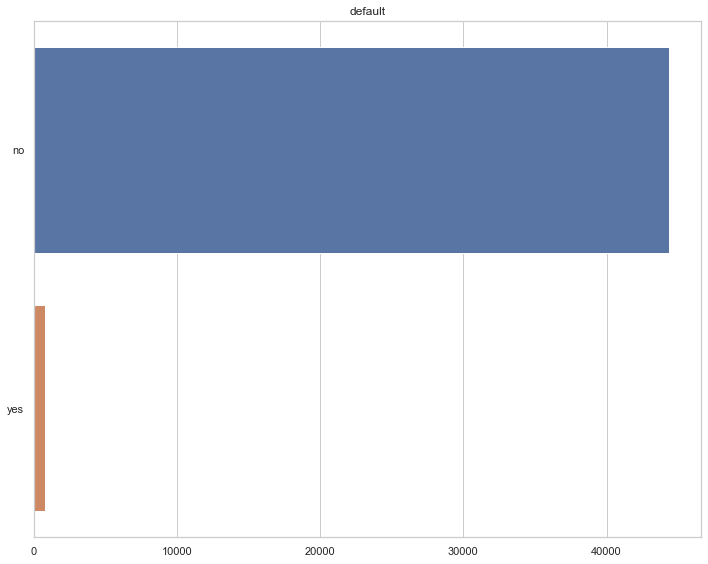

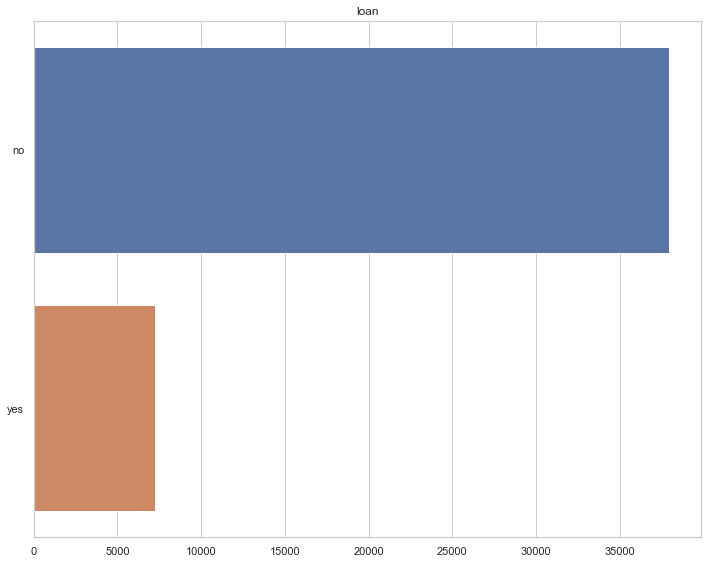

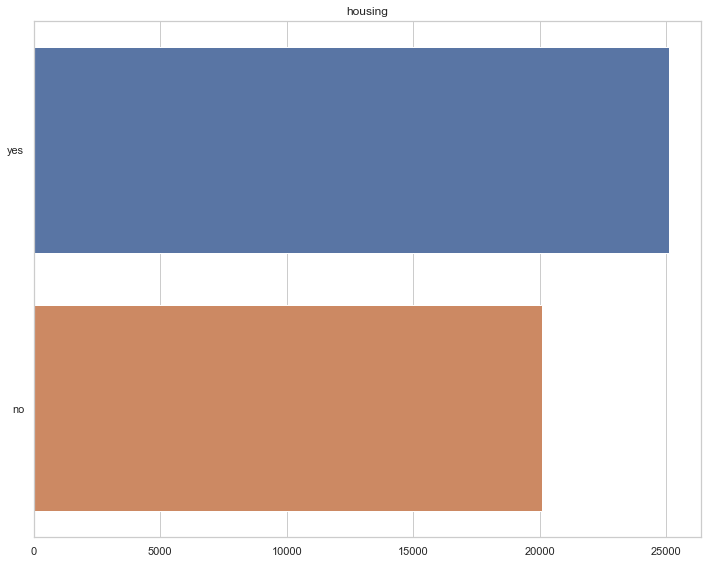

In [270]:
#Having a general picture about those features in this dataset
categorcial_variables = ['deposit','job', 'marital', 'education', 'default', 'loan','housing']
for col in categorcial_variables:
    plt.figure(figsize=(10,8))
    sns.barplot(bank_df[col].value_counts().values, bank_df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    
fig.suptitle('General Analysis')

<Figure size 50000x40000 with 0 Axes>

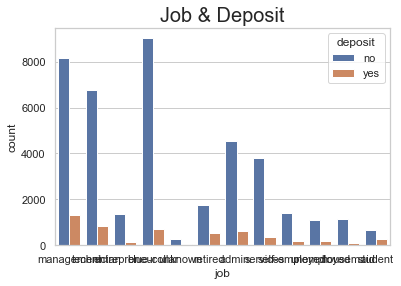

<Figure size 50000x40000 with 0 Axes>

In [271]:
#Discover the relationship between all features with deposit 
sns.set(style='whitegrid')
sns.countplot(x="job",hue="deposit",data=bank_df)
plt.title('Job & Deposit', fontsize = 20)
plt.figure(dpi=500,figsize=(100,80))

<Figure size 1440x1080 with 0 Axes>

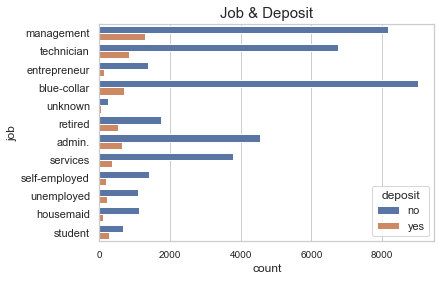

<Figure size 1440x1080 with 0 Axes>

In [272]:
sns.set(style='whitegrid')
sns.countplot(y="job",hue="deposit",data=bank_df)
plt.title('Job & Deposit', fontsize = 15)
plt.xticks(fontsize=10)
plt.figure(figsize=(20,15))

Text(0.5, 1.0, 'Education & Deposit')

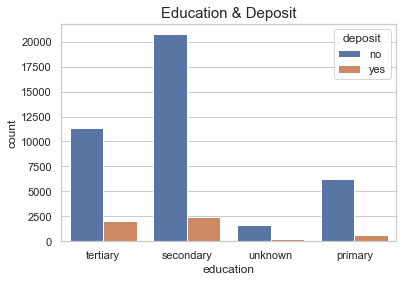

In [273]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="education",hue="deposit",data=bank_df)
plt.title('Education & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Housing & Deposit')

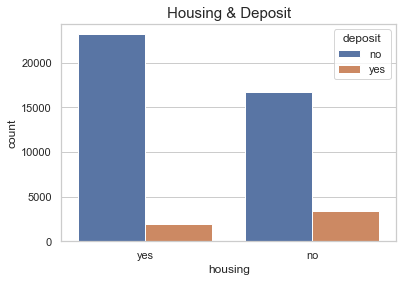

In [274]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="housing",hue="deposit",data=bank_df)
plt.title('Housing & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Loan & Deposit')

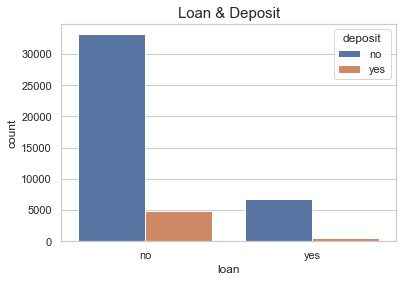

In [275]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="loan",hue="deposit",data=bank_df)
plt.title('Loan & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Marital&deposit')

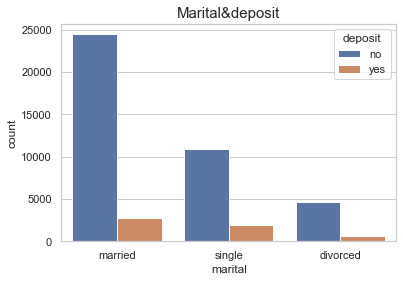

In [276]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="marital",hue="deposit",data=bank_df)
plt.title('Marital&deposit', fontsize = 15)

Text(0.5, 1.0, 'poutcome & Deposit')

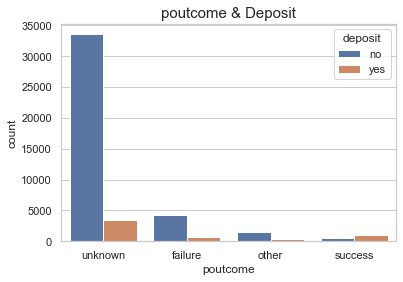

In [277]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="poutcome",hue="deposit",data=bank_df)
plt.title('poutcome & Deposit', fontsize = 15)

In [278]:
# Transfer the data type 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

bank_df['loan']=le.fit_transform(bank_df['loan'])
bank_df['deposit']=le.fit_transform(bank_df['deposit'])
bank_df['default']=le.fit_transform(bank_df['default'])
bank_df['job']=le.fit_transform(bank_df['job'])
bank_df['marital']=le.fit_transform(bank_df['marital'])
bank_df['education']=le.fit_transform(bank_df['education'])
bank_df['poutcome']=le.fit_transform(bank_df['poutcome'])
bank_df['month']=le.fit_transform(bank_df['month'])
bank_df['housing']=le.fit_transform(bank_df['housing'])
bank_df['contact']=le.fit_transform(bank_df['contact'])


bank_df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [279]:
bins = [
        17,40,60,80,100
        ]
customerLables = [
        '17-39','40-59','60-79',
        '80-99'
        ]
bank_df['g_age'] = pd.cut(
        bank_df.age,bins,
        right=False,labels=customerLables
        )
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,g_age
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,40-59
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,40-59
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,17-39
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,40-59
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,17-39
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0,17-39
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0,17-39
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0,40-59
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0,40-59
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0,40-59


Text(0.5, 1.0, 'Age & Deposit')

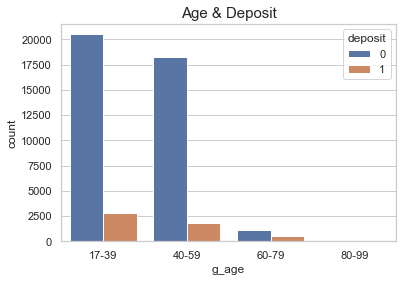

In [289]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="g_age",hue="deposit",data=bank_df)
plt.title('Age & Deposit', fontsize = 15)

In [280]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [281]:
# Create multiple regression model
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np



In [282]:
X = bank_df[['balance','duration','age','job','marital','education', 'loan','day','month','campaign','pdays','previous','poutcome','housing','contact']]
Y = bank_df['deposit']
X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deposit   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     806.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:58:05   Log-Likelihood:                -7474.7
No. Observations:               45211   AIC:                         1.498e+04
Df Residuals:                   45195   BIC:                         1.512e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1192      0.013     -9.506      0.000      -0.144      -0.095
balance     2.325e-06   4.47e-07      5.197      0.000    1.45e-06     3.2e-06
duration       0.0005   5.24e-06     92.312      0.000       0.000       0.000
age            0.0008      0.000      5.477      0.000       0.001       0.001
job            0.0010      0.000      2.412      0.016       0.000       0.002
marital        0.0189      0.002      7.764      0.000       0.014       0.024
education      0.0166      0.002      8.948      0.000       0.013       0.020
loan          -0.0449      0.004    -12.163      0.000      -0.052      -0.038
day           -0.0004      0.000     -2.390      0.017      -0.001   -7.07e-05
month          0.0050      0.000     10.014      0.000       0.004       0.006
campaign      -0.0030      0.000     -6.684      0.000      -0.004      -0.002
pdays          0.0004   2.64e-05     16.666      0.000       0.000       0.000
previous       0.0080      0.001     11.966      0.000       0.007       0.009
poutcome       0.0285      0.003     10.385      0.000       0.023       0.034
housing       -0.0847      0.003    -28.750      0.000      -0.091      -0.079
contact       -0.0387      0.002    -22.547      0.000      -0.042      -0.035
==============================================================================
Omnibus:                    14152.606   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42059.198
Skew:                           1.646   Prob(JB):                         0.00
Kurtosis:                       6.389   Cond. No.                     3.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
X = bank_df[['balance','duration','age','marital','education', 'loan','month','campaign','pdays','previous','poutcome','housing','contact']]
Y = bank_df['deposit']
X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deposit   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     929.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:58:05   Log-Likelihood:                -7480.4
No. Observations:               45211   AIC:                         1.499e+04
Df Residuals:                   45197   BIC:                         1.511e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1208      0.012     -9.926      0.000      -0.145      -0.097
balance     2.321e-06   4.47e-07      5.187      0.000    1.44e-06     3.2e-06
duration       0.0005   5.24e-06     92.374      0.000       0.000       0.000
age            0.0008      0.000      5.486      0.000       0.001       0.001
marital        0.0192      0.002      7.880      0.000       0.014       0.024
education      0.0172      0.002      9.356      0.000       0.014       0.021
loan          -0.0451      0.004    -12.230      0.000      -0.052      -0.038
month          0.0049      0.000      9.834      0.000       0.004       0.006
campaign      -0.0031      0.000     -7.148      0.000      -0.004      -0.002
pdays          0.0004   2.64e-05     16.731      0.000       0.000       0.000
previous       0.0081      0.001     12.008      0.000       0.007       0.009
poutcome       0.0284      0.003     10.351      0.000       0.023       0.034
housing       -0.0853      0.003    -29.029      0.000      -0.091      -0.080
contact       -0.0386      0.002    -22.526      0.000      -0.042      -0.035
==============================================================================
Omnibus:                    14162.806   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42113.224
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       6.391   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""